In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

In [2]:
def calculatePercentiles(df, device):
    print("="*50)
    print(device)
    print("Max : ",df['run_time'].max())
    print("Min : ",df['run_time'].min())
    print("Median : ",df['run_time'].median())
    print("90th Percentile: ",df['run_time'].quantile(0.90))
    print("95th Percentile: ",df['run_time'].quantile(0.95))
    print("99th Percentile: ",df['run_time'].quantile(0.99))
    print("="*50)

In [3]:
df1=pd.read_csv("/home/drone/Downloads/IPDPS/outputs_monodepth/AGX_monodepth_output.csv")
df2=pd.read_csv("/home/drone/Downloads/IPDPS/outputs_monodepth/Nano_monodepth_output.csv")
df3=pd.read_csv("/home/drone/Downloads/IPDPS/outputs_monodepth/NX_monodepth_output.csv")

df1['run_time'] *=1000
df2['run_time'] *=1000
df3['run_time'] *=1000

# Dropping max value
df1=df1.loc[df1['run_time']!=df1['run_time'].max()]
df2=df2.loc[df2['run_time']<df2['run_time'].quantile(0.99)]
df3=df3.loc[df3['run_time']<df3['run_time'].quantile(0.99)]

# Dropping values for df2 where run_time is less than 130
df2=df2.loc[df2['run_time']>150]
df3=df3.loc[df3['run_time']>170]

df1["model"] = "Orin AGX"
df2["model"] = "Orin Nano"
df3["model"] = "Xavier NX"

calculatePercentiles(df1, "Orin AGX")
calculatePercentiles(df2, "Orin Nano")
calculatePercentiles(df3, "Xavier NX")

df_combined = pd.concat([df1, df2, df3])

Orin AGX
Max :  104.9997806549072
Min :  73.2319355010986
Median :  74.7957229614257
90th Percentile:  75.1821994781494
95th Percentile:  75.5012035369873
99th Percentile:  76.33719444274895
Orin Nano
Max :  233.1085205078125
Min :  152.0113945007324
Median :  222.51141071319574
90th Percentile:  226.23028755187985
95th Percentile:  227.57728099822992
99th Percentile:  230.4938817024231
Xavier NX
Max :  256.0174465179443
Min :  173.1774806976318
Median :  231.7137718200683
90th Percentile:  234.48081016540525
95th Percentile:  236.01634502410886
99th Percentile:  238.89637947082517


In [4]:
df_combined.groupby('model').describe()

run_time                                                            \
             count        mean       std         min         25%         50%   
model                                                                          
Orin AGX    1191.0   74.904186  1.435198   73.231936   74.586511   74.795723   
Orin Nano   1160.0  221.891331  7.956461  152.011395  221.986413  222.511411   
Xavier NX   1175.0  231.874506  4.688690  173.177481  231.302619  231.713772   

                                   
                  75%         max  
model                              
Orin AGX    74.978828  104.999781  
Orin Nano  223.526180  233.108521  
Xavier NX  232.526898  256.017447

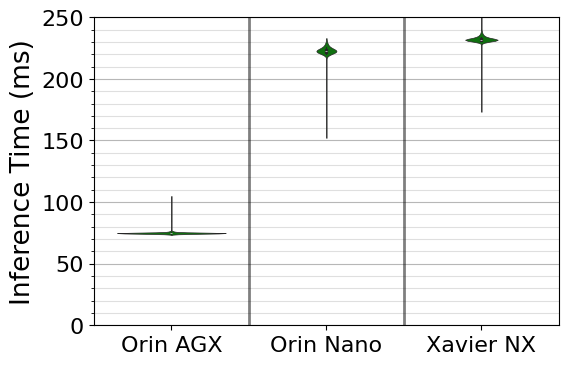

In [6]:

# Create a violin plot for the Time column
plt.figure(figsize=(6, 4))

# Create the merged violin plot with boxplot/median indicator inside
# ax = sns.violinplot(x='Model', y='Difference', data=df_combined, zorder=2, inner='box', width=1.0, linewidth=0.5, color='green', legend=False)  # No internal plot yet
ax = sns.violinplot(x='model', y='run_time', data=df_combined, zorder=2, inner='box', width=0.7, linewidth=0.5, color='green', legend=False, cut=0)


# Set the title18
# plt.title("Inferencing Time on Orin AGX", fontsize=7)

# Customize Y-axis (time in ms)
plt.ylabel("Inference Time (ms)", fontsize=19)
# plt.xlabel("Model", fontsize=10)
plt.xlabel("", fontsize=0)

# Customize Y-ticks
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)

# Set limits for y-axis (set max to 500)
plt.ylim(0, 250)  # Clip the plot at 300
ax.set_yticks(np.arange(0, 251, 50))
ax.tick_params(axis='x', which='minor', bottom=False)

# ax.grid(which='minor', axis='y', linestyle='-')
ax.grid(which='minor', axis='y', linestyle='-',alpha=0.4)
ax.grid(which='major', axis='y', linestyle='-', alpha=0.9)

# Customize grid lines and minor ticks
plt.minorticks_on()  # Enable minor ticks (needed for minor grid lines)


# To add vertical lines for x-axis to distinguish between different devices
xticks = ax.get_xticks()
for i in range(len(xticks) - 1):
    midpoint = (xticks[i] + xticks[i + 1]) / 2
    ax.axvline(midpoint, color='k', linestyle='-', alpha=0.5, linewidth=2)

# Save the plot as a PNG file
out_path="/home/drone/Downloads/IPDPS/outputs_monodepth/"
outfile=out_path+"3_monodepth"
plt.savefig(outfile+".png", dpi=700, bbox_inches='tight')
plt.savefig(outfile+".pdf", dpi=700, bbox_inches='tight', format='pdf')

# Show the plot
plt.show()